<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=3cbrdH225_nH

Rules:

- by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

- For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

- it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)


- It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


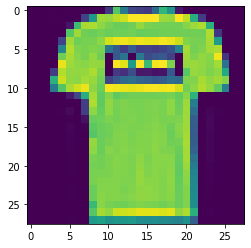

In [29]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

In [18]:
print(train_labels[0])
print(train_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

all of the values in the number are between 0 and 255.

all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [19]:
train_images = train_images / 255
test_images = test_images / 255

In [9]:
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)), #size of image
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [20]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8226 - accuracy: 0.7112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4100 - accuracy: 0.8555
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8654
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8782
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3228 - accuracy: 0.8826


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8679


Exercise - 1

In [22]:
classifications = model.predict(test_images)

print(classifications[0])

[1.10537665e-04 1.14460275e-09 2.51040774e-06 3.69833430e-07
 1.91993627e-06 9.89096090e-02 2.11918614e-05 6.62501901e-02
 1.66834251e-03 8.33035290e-01]


In [23]:
print(test_labels[0])

9


Exercise - 2

In [33]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.1
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5767 - accuracy: 0.7976
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3653 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3213 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2939 - accuracy: 0.8901
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3402 - accuracy: 0.8747
0.8747000098228455
[1.9940900e-08 1.8644164e-08 3.2266065e-08 5.1928244e-09 7.2994055e-09
 1.5636936e-02 2.3795090e-08 2.6335251e-03 1.2076586e-07 9.8172933e-01]
9


In [36]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

xxxx = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=30, callbacks=[xxxx])




2.4.1
Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5909 - accuracy: 0.7919
Epoch 2/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3675 - accuracy: 0.8660
Epoch 3/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3263 - accuracy: 0.8794
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2990 - accuracy: 0.8886
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2806 - accuracy: 0.8940
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2636 - accuracy: 0.9012
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2488 - accuracy: 0.9063

Reached 90% accuracy so cancelling training!


In [40]:
import tensorflow as tf

class stopepoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

mycallback = stopepoch()
mydata = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mydata.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, callbacks=[mycallback])

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3424 - accuracy: 0.8978

Reached 90% accuracy so cancelling training!
